# Model Testing

In [7]:
from utils import load_model_history, plot_performance_curves, load_test_data, make_predictions, plot_confusion_matrix

In [2]:
# Load model from the model name
model_name = "resnet50-regularized-adamax-epochs100-noaug_model_cifake"

model_history_loaded, classifier, history = load_model_history(model_name)

## Model Architecture

In [3]:
# Get model architecture
classifier.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                           

## Performance curves

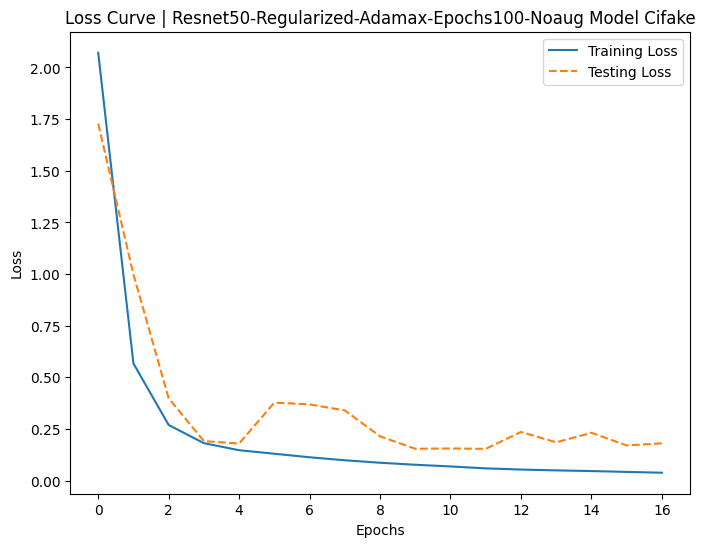

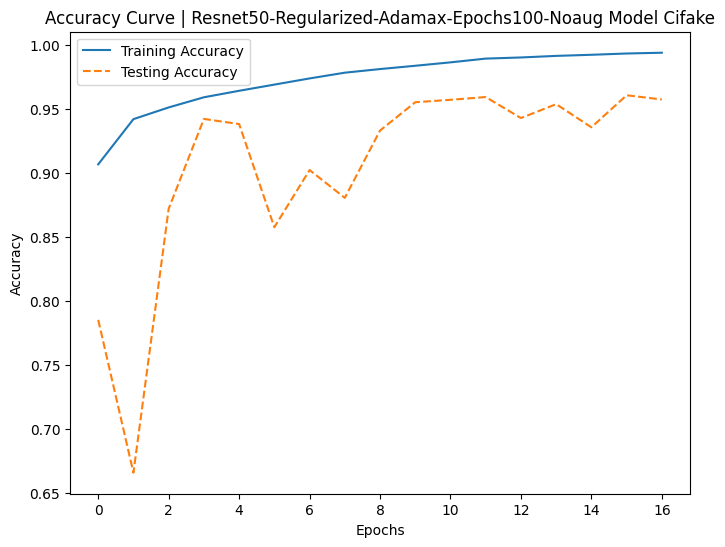

In [4]:
# Plot model performance curves
plot_performance_curves(history, model_name)

## Model Evaluation and Testing

In [136]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [141]:
# Load testing data from directory
from keras.preprocessing.image import ImageDataGenerator
test_dir = './datasets/CIFAKE/test/'

test_ds = load_test_data(test_dir, augmented=False, batch_size=200)

Found 20000 files belonging to 2 classes.


In [142]:
data_gen = ImageDataGenerator()

test_generator = data_gen.flow_from_directory(
    test_dir,
    batch_size=200,
    target_size=(32,32),
    class_mode='binary',
    shuffle = False,
)

Found 20000 images belonging to 2 classes.


In [143]:
classifier.evaluate(test_generator)

100/100 [==============================] - 4s 38ms/step - loss: 0.1537 - accuracy: 0.9600 - precision_3: 0.9591 - recall_3: 0.9610


[0.1537260115146637,
 0.9599999785423279,
 0.9590818285942078,
 0.9610000252723694]

In [144]:
# Evaluate model
classifier.evaluate(test_ds)

100/100 [==============================] - 3s 23ms/step - loss: 0.1539 - accuracy: 0.9593 - precision_3: 0.9582 - recall_3: 0.9606


[0.15387773513793945,
 0.9593499898910522,
 0.9582045078277588,
 0.9606000185012817]

In [145]:
test_ds = test_ds.unbatch()

In [146]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
labels = np.array(list(test_ds.map(lambda x,y: y)))
images = np.array(list(test_ds.map(lambda x,y: x)))

In [147]:
classifier.evaluate(images, labels)

625/625 [==============================] - 6s 10ms/step - loss: 3.9430 - accuracy: 0.5023 - precision_3: 0.5023 - recall_3: 0.5035


[3.9430129528045654,
 0.5023000240325928,
 0.5022944808006287,
 0.5034999847412109]

In [148]:
pred = classifier.predict(images)

625/625 [==============================] - 5s 8ms/step


In [149]:
predicted = (pred > 0.5).astype("int32").flatten()
predicted

array([0, 0, 1, ..., 1, 1, 0])

In [150]:
print(confusion_matrix(labels, predicted))
print(classification_report(labels, predicted))

[[5011 4989]
 [4965 5035]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10000
           1       0.50      0.50      0.50     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [151]:
pred_gen = classifier.predict(test_generator)

100/100 [==============================] - 4s 38ms/step


In [152]:
predicted_gen = (pred_gen > 0.5).astype("int32").flatten()

In [153]:
print(confusion_matrix(test_generator.classes, predicted_gen))
print(classification_report(test_generator.classes, predicted_gen))

[[9590  410]
 [ 390 9610]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     10000
           1       0.96      0.96      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

